In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='serif')

sns.set()

In [2]:
data = pd.read_csv('results/wall-time.csv', index_col='n')

data = data.groupby(data.index).agg(np.median)
data.index.names = ['Tamaño de matriz']


data

,row-seq,col-seq,row-par-3,row-par-6,row-par-12,row-par-24,row-par-48,row-par-96,col-par-3,col-par-6,col-par-12,col-par-24,col-par-48,col-par-96
Tamaño de matriz,,,,,,,,,,,,,,
500,0.0050,0.0050,0.0060,0.0050,0.0050,0.0050,0.0050,0.0060,0.0065,0.0055,0.0040,0.0050,0.0050,0.0060
1000,0.0190,0.0200,0.0180,0.0135,0.0100,0.0090,0.0100,0.0110,0.0180,0.0135,0.0100,0.0100,0.0100,0.0110
1500,0.0420,0.0420,0.0310,0.0200,0.0190,0.0160,0.0150,0.0160,0.0310,0.0205,0.0200,0.0150,0.0170,0.0155
2000,0.0750,0.0780,0.0420,0.0315,0.0280,0.0230,0.0290,0.0235,0.0430,0.0305,0.0290,0.0240,0.0230,0.0250
2500,0.1170,0.1230,0.0580,0.0390,0.0345,0.0315,0.0295,0.0320,0.0595,0.0470,0.0355,0.0310,0.0325,0.0305
3000,0.1680,0.1800,0.0770,0.0590,0.0420,0.0380,0.0400,0.0380,0.0790,0.0500,0.0450,0.0380,0.0360,0.0390
3500,0.2300,0.2510,0.0990,0.0630,0.0540,0.0460,0.0455,0.0485,0.1050,0.0620,0.0550,0.0490,0.0440,0.0455
4000,0.3000,0.3430,0.1250,0.0775,0.0640,0.0550,0.0550,0.0540,0.1340,0.0770,0.0645,0.0580,0.0585,0.0580
4500,0.3800,0.4480,0.1545,0.0920,0.0805,0.0650,0.0740,0.0640,0.1650,0.0960,0.0780,0.0650,0.0640,0.0625


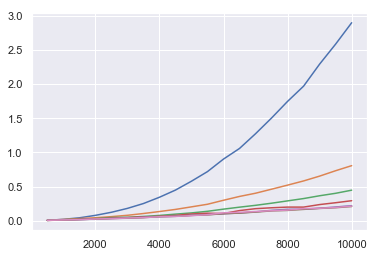

In [3]:
plt.plot(data.index, data.filter(regex='col-.*'))


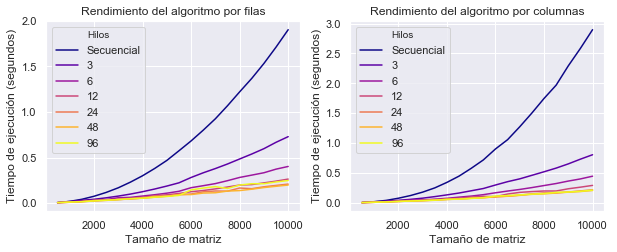

In [4]:
new_col_names = ['Secuencial'] + [n for n in [3, 6, 12, 24, 48, 96]]

column_data = data.filter(regex='col-.*')
column_data.columns = new_col_names
column_data.columns.name = 'Hilos'

accel_column =  (1 / column_data.iloc[:, 1:]).mul(data['col-seq'], axis=0)

row_data = data.filter(regex='row-.*')
row_data.columns = new_col_names
row_data.columns.name = 'Hilos'

accel_row = (1 / row_data.iloc[:, 1:]).mul(data['row-seq'], axis=0)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(10, 3.5)




row_plot = row_data.plot(title='Rendimiento del algoritmo por filas', ax=ax1, colormap='plasma')
row_plot.set_ylabel('Tiempo de ejecución (segundos)')

col_plot = column_data.plot(title='Rendimiento del algoritmo por columnas', ax=ax2, colormap='plasma')
col_plot.set_ylabel('Tiempo de ejecución (segundos)')


fig.savefig('charts/stars_perf.png', dpi=500)


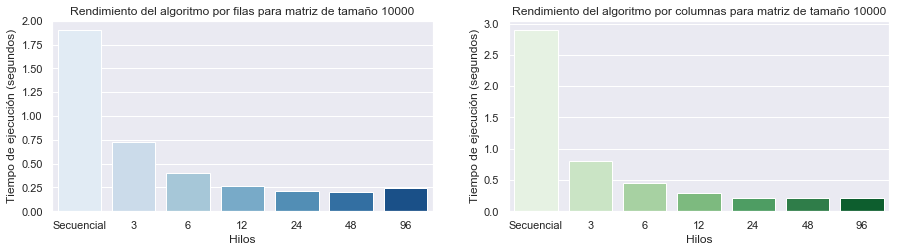

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 3.5)

size = row_data.iloc[-1].name

row_plt = sns.barplot(x=row_data.iloc[-1].index, y=row_data.iloc[-1],
                      palette="Blues", ax=ax1)
row_plt.set_title('Rendimiento del algoritmo por filas para matriz de tamaño {}'.format(size))
col_plt = sns.barplot(x=column_data.iloc[-1].index, y=column_data.iloc[-1],
                      palette="Greens", ax=ax2)
col_plt.set_title('Rendimiento del algoritmo por columnas para matriz de tamaño {}'.format(size))

# row_plt = row_data.iloc[-1].plot(title='Rendimiento del algoritmo por filas para matriz de tamaño 5000',
#                                 ax=ax1, kind='bar', colormap='plasma')
row_plt.set_ylabel('Tiempo de ejecución (segundos)')
col_plt.set_ylabel('Tiempo de ejecución (segundos)')

fig.savefig('charts/stars_perf_bar.png', dpi=500)

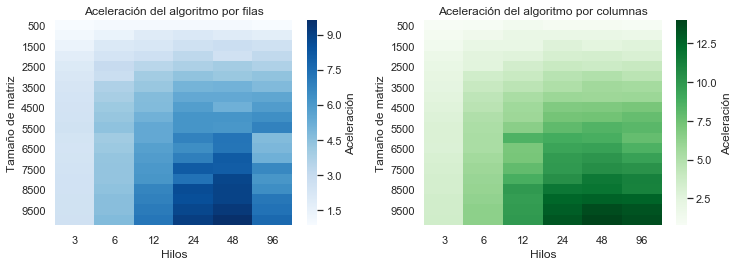

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(10, 3.5)
fig.tight_layout(pad=1.08, h_pad=None, w_pad=4, rect=None)

sns.heatmap(accel_row, cbar_kws={'label': 'Aceleración'},
            cmap='Blues', ax=ax1).set_title("Aceleración del algoritmo por filas")

sns.heatmap(accel_column, cbar_kws={'label': 'Aceleración'}, cmap='Greens',
            ax=ax2).set_title("Aceleración del algoritmo por columnas")

fig.savefig('charts/stars_accel.png', dpi=500)

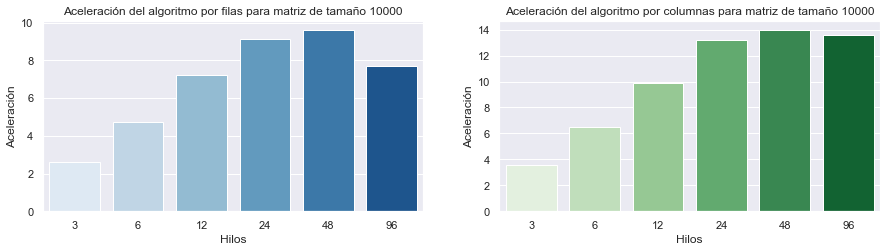

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 3.5)

size = row_data.iloc[-1].name

row_plt = sns.barplot(x=accel_row.iloc[-1].index, y=accel_row.iloc[-1],
                      palette="Blues", ax=ax1)
row_plt.set_title('Aceleración del algoritmo por filas para matriz de tamaño {}'.format(size))
col_plt = sns.barplot(x=accel_column.iloc[-1].index, y=accel_column.iloc[-1],
                      palette="Greens", ax=ax2)
col_plt.set_title('Aceleración del algoritmo por columnas para matriz de tamaño {}'.format(size))

# row_plt = row_data.iloc[-1].plot(title='Rendimiento del algoritmo por filas para matriz de tamaño 5000',
#                                 ax=ax1, kind='bar', colormap='plasma')
row_plt.set_ylabel('Aceleración')
col_plt.set_ylabel('Aceleración')

fig.savefig('charts/stars_accel_bar.png', dpi=500)

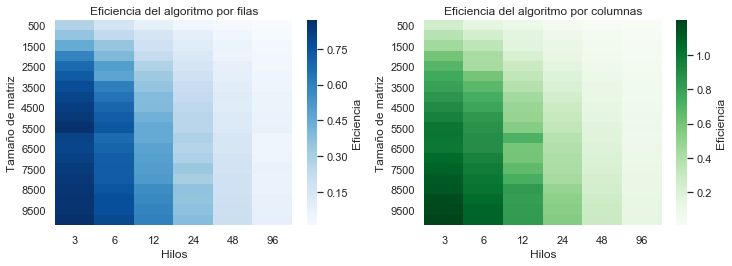

In [8]:
n_threads = pd.Series([1] + [3 * 2**n for n in range(6)], index=new_col_names)

efficiency_row = accel_row / n_threads.iloc[1:]
efficiency_col = accel_column / n_threads.iloc[1:]

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(10, 3.5)
fig.tight_layout(pad=1.08, h_pad=None, w_pad=4, rect=None)

sns.heatmap(efficiency_row, cmap='Blues', cbar_kws={'label': 'Eficiencia'},
            ax=ax1).set_title("Eficiencia del algoritmo por filas")

sns.heatmap(efficiency_col, cmap='Greens', cbar_kws={'label': 'Eficiencia'},
            ax=ax2).set_title("Eficiencia del algoritmo por columnas")

fig.savefig('charts/stars_eff.png', dpi=500)

10000

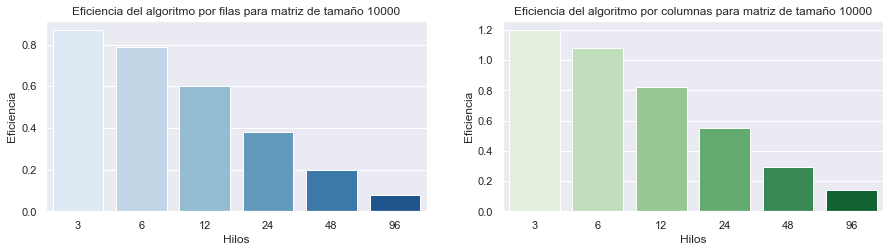

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 3.5)

size = row_data.iloc[-1].name
display(size)

row_plt = sns.barplot(x=efficiency_row.iloc[-1].index, y=efficiency_row.iloc[-1],
                      palette="Blues", ax=ax1)
row_plt.set_title('Eficiencia del algoritmo por filas para matriz de tamaño {}'.format(size))
col_plt = sns.barplot(x=efficiency_col.iloc[-1].index, y=efficiency_col.iloc[-1],
                      palette="Greens", ax=ax2)
col_plt.set_title('Eficiencia del algoritmo por columnas para matriz de tamaño {}'.format(size))

# row_plt = row_data.iloc[-1].plot(title='Rendimiento del algoritmo por filas para matriz de tamaño 5000',
#                                 ax=ax1, kind='bar', colormap='plasma')
row_plt.set_ylabel('Eficiencia')
col_plt.set_ylabel('Eficiencia')

fig.savefig('charts/stars_eff_bar.png', dpi=500)

7

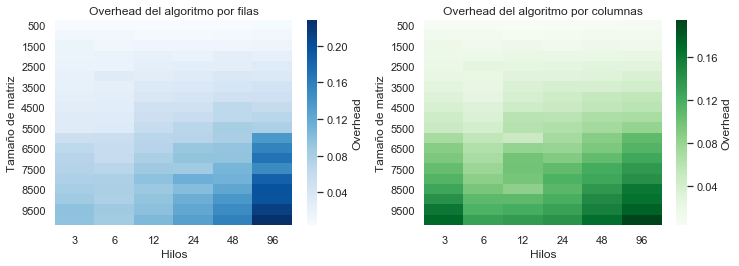

In [13]:
display(len(n_threads))
row_serial_time = pd.concat([row_data.iloc[:, 0]] * (len(n_threads) - 1), axis=1)
col_serial_time = pd.concat([column_data.iloc[:, 0]] * (len(n_threads) - 1), axis=1)

row_serial_time.columns = n_threads.index[1:]
col_serial_time.columns = n_threads.index[1:]

row_overhead = row_data.iloc[:, 1:] - (row_serial_time / n_threads.iloc[1:])
col_overhead = column_data.iloc[:, 1:] -  (row_serial_time / n_threads.iloc[1:])

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(10, 3.5)
fig.tight_layout(pad=1.08, h_pad=None, w_pad=4, rect=None)

sns.heatmap(row_overhead, cmap='Blues', cbar_kws={'label': 'Overhead'},
            ax=ax1).set_title("Overhead del algoritmo por filas")

sns.heatmap(col_overhead, cmap='Greens', cbar_kws={'label': 'Overhead'},
            ax=ax2).set_title("Overhead del algoritmo por columnas")

fig.savefig('charts/stars_overhead.png', dpi=500)

In [16]:
print(row_data.to_latex())
print(column_data.to_latex())


\begin{tabular}{lrrrrrrr}
\toprule
Hilos &  Secuencial &       3 &       6 &      12 &      24 &      48 &      96 \\
Tamaño de matriz &             &         &         &         &         &         &         \\
\midrule
500              &      0.0050 &  0.0060 &  0.0050 &  0.0050 &  0.0050 &  0.0050 &  0.0060 \\
1000             &      0.0190 &  0.0180 &  0.0135 &  0.0100 &  0.0090 &  0.0100 &  0.0110 \\
1500             &      0.0420 &  0.0310 &  0.0200 &  0.0190 &  0.0160 &  0.0150 &  0.0160 \\
2000             &      0.0750 &  0.0420 &  0.0315 &  0.0280 &  0.0230 &  0.0290 &  0.0235 \\
2500             &      0.1170 &  0.0580 &  0.0390 &  0.0345 &  0.0315 &  0.0295 &  0.0320 \\
3000             &      0.1680 &  0.0770 &  0.0590 &  0.0420 &  0.0380 &  0.0400 &  0.0380 \\
3500             &      0.2300 &  0.0990 &  0.0630 &  0.0540 &  0.0460 &  0.0455 &  0.0485 \\
4000             &      0.3000 &  0.1250 &  0.0775 &  0.0640 &  0.0550 &  0.0550 &  0.0540 \\
4500             &      0.3